Map generated: launch_site_map.html

Training models... (This might take 30-60 seconds)
Logistic Regression Test Accuracy: 0.8333
SVM Test Accuracy: 0.7778
Decision Tree Test Accuracy: 0.8889
KNN Test Accuracy: 0.7778


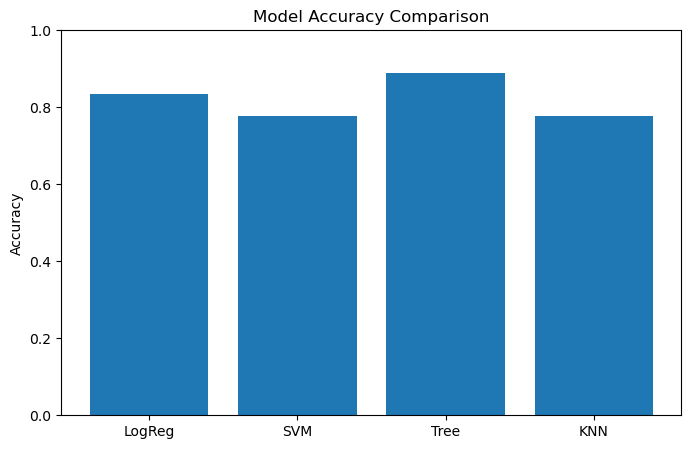

In [4]:
# Install folium for the map (only needs to be run once)
!pip install folium

import folium
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# --- PART A: INTERACTIVE MAP ---
# Load geospatial data directly using Pandas (No wget needed)
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_geo.csv'
spacex_df = pd.read_csv(url)

# Prepare data for map
launch_sites_df = spacex_df.groupby(['Launch Site'], as_index=False).first()[['Launch Site', 'Lat', 'Long']]

# Create Map centered on USA
site_map = folium.Map(location=[29.55, -95.08], zoom_start=4)

# Add circles and markers for launch sites
for index, row in launch_sites_df.iterrows():
    folium.Circle([row['Lat'], row['Long']], radius=1000, color='#000000', fill=True).add_to(site_map)
    folium.Marker([row['Lat'], row['Long']], popup=row['Launch Site']).add_to(site_map)

# Add Success/Fail Markers (Green/Red)
spacex_df['marker_color'] = spacex_df['class'].apply(lambda x: 'green' if x == 1 else 'red')
for index, record in spacex_df.iterrows():
    folium.Marker(
        location=[record['Lat'], record['Long']],
        icon=folium.Icon(color='white', icon_color=record['marker_color']),
        popup=record['Launch Site']
    ).add_to(site_map)

# Save map
site_map.save("launch_site_map.html")
print("Map generated: launch_site_map.html")

# --- PART B: MACHINE LEARNING ---
# Load prepared datasets
X = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv")
# Load target and convert to numpy array
Y_df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
Y = Y_df['Class'].to_numpy()

# Standardize and Split
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

print("\nTraining models... (This might take 30-60 seconds)")

# Define and Train Models
# 1. Logistic Regression
lr = LogisticRegression()
param_lr = {'C':[0.01,0.1,1], 'penalty':['l2'], 'solver':['lbfgs']}
logreg_cv = GridSearchCV(lr, param_lr, cv=10)
logreg_cv.fit(X_train, Y_train)
print(f"Logistic Regression Test Accuracy: {logreg_cv.score(X_test, Y_test):.4f}")

# 2. SVM
svm = SVC()
param_svm = {'kernel':('linear', 'rbf'), 'C': [1, 10]}
svm_cv = GridSearchCV(svm, param_svm, cv=10)
svm_cv.fit(X_train, Y_train)
print(f"SVM Test Accuracy: {svm_cv.score(X_test, Y_test):.4f}")

# 3. Decision Tree
tree = DecisionTreeClassifier()
param_tree = {'criterion': ['gini', 'entropy'], 'max_depth': [4,5,6]}
tree_cv = GridSearchCV(tree, param_tree, cv=10)
tree_cv.fit(X_train, Y_train)
print(f"Decision Tree Test Accuracy: {tree_cv.score(X_test, Y_test):.4f}")

# 4. KNN
knn = KNeighborsClassifier()
param_knn = {'n_neighbors': [3, 5, 7, 10]}
knn_cv = GridSearchCV(knn, param_knn, cv=10)
knn_cv.fit(X_train, Y_train)
print(f"KNN Test Accuracy: {knn_cv.score(X_test, Y_test):.4f}")

# Plot Comparison
models = ['LogReg', 'SVM', 'Tree', 'KNN']
scores = [logreg_cv.score(X_test, Y_test), svm_cv.score(X_test, Y_test), tree_cv.score(X_test, Y_test), knn_cv.score(X_test, Y_test)]

plt.figure(figsize=(8, 5))
plt.bar(models, scores)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()